In [8]:
import pandas as pd
import os
import glob


In [15]:
zip_path = r"C:\Users\HP\Downloads\march-machine-learning-mania-2025 (1).zip"

In [26]:
extract_path =r"C:\Users\HP\Downloads\march_madness_data"

In [27]:
import zipfile

In [28]:
if os.path.exists(zip_path):
    print("File found!")
else:
    print("File not found! Check the path.")

File found!


In [29]:
# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("ZIP file extracted successfully!")


ZIP file extracted successfully!


In [30]:
extracted_files = os.listdir(extract_path )
extracted_files

['Cities.csv',
 'Conferences.csv',
 'MConferenceTourneyGames.csv',
 'MGameCities.csv',
 'MMasseyOrdinals.csv',
 'MNCAATourneyCompactResults.csv',
 'MNCAATourneyDetailedResults.csv',
 'MNCAATourneySeedRoundSlots.csv',
 'MNCAATourneySeeds.csv',
 'MNCAATourneySlots.csv',
 'MRegularSeasonCompactResults.csv',
 'MRegularSeasonDetailedResults.csv',
 'MSeasons.csv',
 'MSecondaryTourneyCompactResults.csv',
 'MSecondaryTourneyTeams.csv',
 'MTeamCoaches.csv',
 'MTeamConferences.csv',
 'MTeams.csv',
 'MTeamSpellings.csv',
 'SampleSubmissionStage1.csv',
 'SeedBenchmarkStage1.csv',
 'WConferenceTourneyGames.csv',
 'WGameCities.csv',
 'WNCAATourneyCompactResults.csv',
 'WNCAATourneyDetailedResults.csv',
 'WNCAATourneySeeds.csv',
 'WNCAATourneySlots.csv',
 'WRegularSeasonCompactResults.csv',
 'WRegularSeasonDetailedResults.csv',
 'WSeasons.csv',
 'WSecondaryTourneyCompactResults.csv',
 'WSecondaryTourneyTeams.csv',
 'WTeamConferences.csv',
 'WTeams.csv',
 'WTeamSpellings.csv']

In [31]:
games_df = pd.read_csv(os.path.join(extract_path, "MRegularSeasonCompactResults.csv"))

In [32]:
print(games_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190771 entries, 0 to 190770
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Season   190771 non-null  int64 
 1   DayNum   190771 non-null  int64 
 2   WTeamID  190771 non-null  int64 
 3   WScore   190771 non-null  int64 
 4   LTeamID  190771 non-null  int64 
 5   LScore   190771 non-null  int64 
 6   WLoc     190771 non-null  object
 7   NumOT    190771 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 11.6+ MB
None


In [33]:
print(games_df.head())

   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985      20     1228      81     1328      64    N      0
1    1985      25     1106      77     1354      70    H      0
2    1985      25     1112      63     1223      56    H      0
3    1985      25     1165      70     1432      54    H      0
4    1985      25     1192      86     1447      74    H      0


In [34]:
print(games_df.isnull().sum())

Season     0
DayNum     0
WTeamID    0
WScore     0
LTeamID    0
LScore     0
WLoc       0
NumOT      0
dtype: int64


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


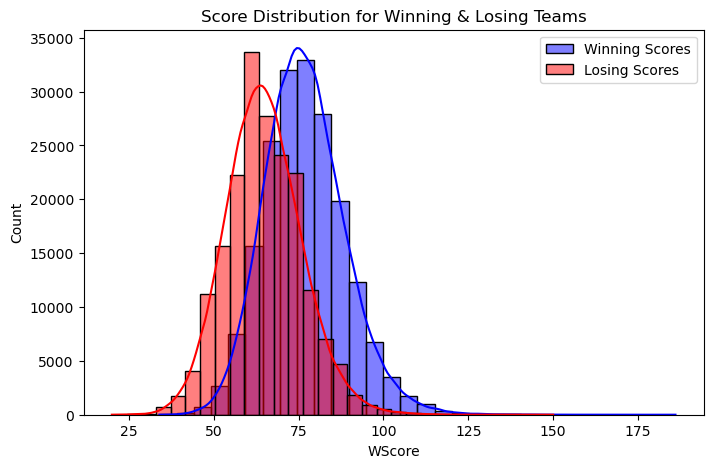

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(games_df['WScore'], bins=30, kde=True, color='blue', label="Winning Scores")
sns.histplot(games_df['LScore'], bins=30, kde=True, color='red', label="Losing Scores")
plt.legend()
plt.title("Score Distribution for Winning & Losing Teams")
plt.show()

Winning  & Losing Score Distribution:

-Most games have winning scores between 60-90 points.
-Losing teams tend to score 50-80 points.
-few extreme blowouts with very high scores.


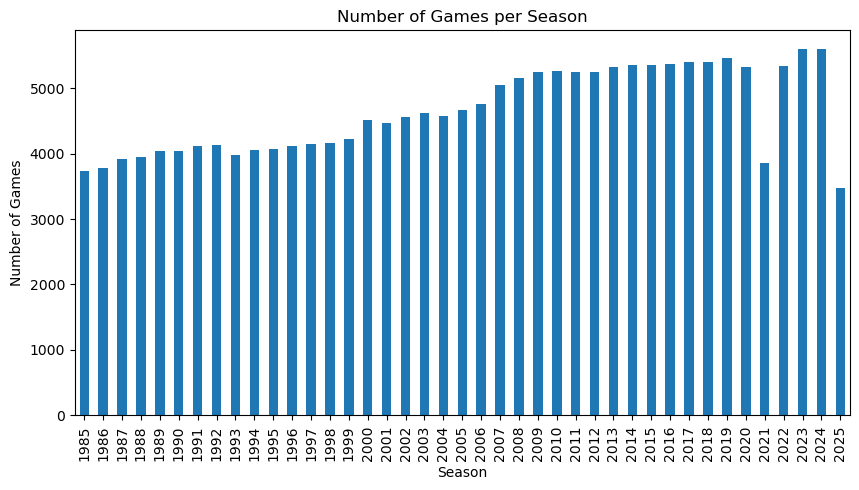

In [38]:
games_df['Season'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Number of Games per Season")
plt.xlabel("Season")
plt.ylabel("Number of Games")
plt.show()

The number of games  were being played between 2023-2024 

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


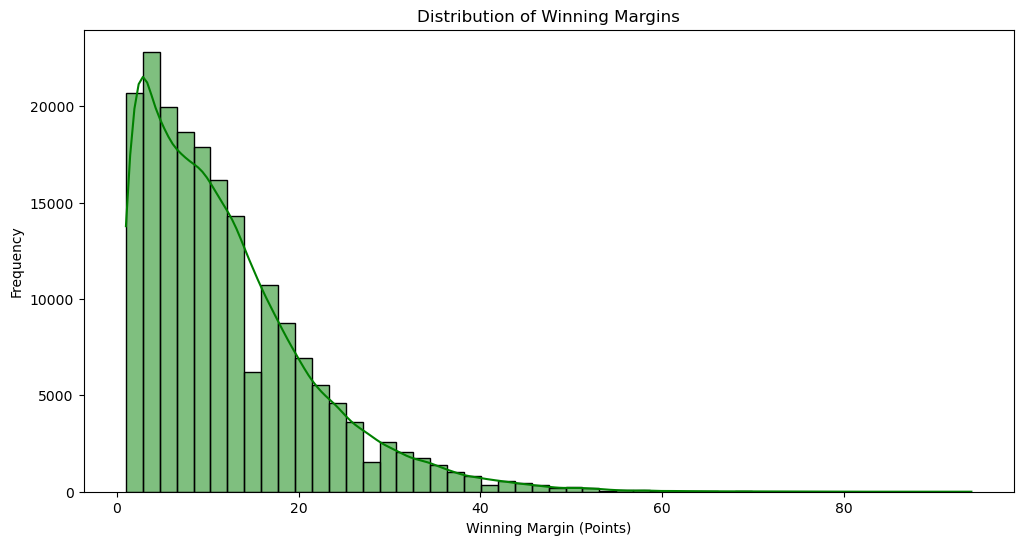

In [40]:
# Winning margin distribution
games_df['WinningMargin'] = games_df['WScore'] - games_df['LScore']
plt.figure(figsize=(12, 6))
sns.histplot(games_df['WinningMargin'], bins=50, kde=True, color="green")
plt.title("Distribution of Winning Margins")
plt.xlabel("Winning Margin (Points)")
plt.ylabel("Frequency")
plt.show()

Winning Margin Distribution:

-Most games are decided by 5-15 points.
-Close games (<5 points) are common, but big blowouts (30+ points) are rare.

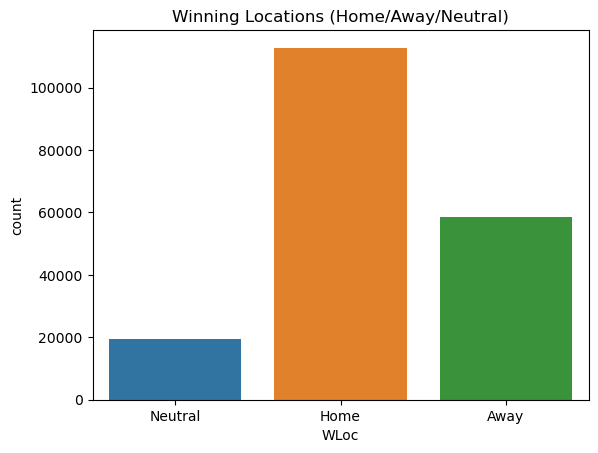

In [41]:
games_df['WLoc'] = games_df['WLoc'].map({'H': 'Home', 'A': 'Away', 'N': 'Neutral'})

sns.countplot(x=games_df['WLoc'])
plt.title("Winning Locations (Home/Away/Neutral)")
plt.show()

Home-Court Advantage Analysis:

-Home teams (H) win significantly more games than Away (A) or Neutral (N) locations.
-Away teams win the least – showing a clear disadvantage when playing on the road.
-Neutral site games (common in tournaments) have fewer total games but are more balanced.


In [43]:
# Count wins by location (H = Home, A = Away, N = Neutral)
win_location_counts = games_df['WLoc'].value_counts()



In [45]:
print(win_location_counts)

WLoc
Home       112741
Away        58493
Neutral     19537
Name: count, dtype: int64


In [46]:
tourney_results = pd.read_csv(os.path.join(extract_path, "MNCAATourneyCompactResults.csv"))


In [47]:
tourney_seeds = pd.read_csv(os.path.join(extract_path, "MNCAATourneySeeds.csv"))


In [48]:
# Merge tournament results with seeds
tourney_results = tourney_results.merge(tourney_seeds, left_on="WTeamID", right_on="TeamID", how="left")
tourney_results = tourney_results.rename(columns={"Seed": "WSeed"}).drop(columns=["TeamID"])


In [49]:
tourney_results = tourney_results.merge(tourney_seeds, left_on="LTeamID", right_on="TeamID", how="left")
tourney_results = tourney_results.rename(columns={"Seed": "LSeed"}).drop(columns=["TeamID"])


In [50]:
# Extract numeric seed values
tourney_results['WSeed'] = tourney_results['WSeed'].str.extract('(\d+)').astype(float)
tourney_results['LSeed'] = tourney_results['LSeed'].str.extract('(\d+)').astype(float)


In [51]:
# Identify upsets
tourney_results['Upset'] = tourney_results['WSeed'] > tourney_results['LSeed']
upset_rate = tourney_results['Upset'].mean()


In [52]:
print(f"Upset Rate: {upset_rate:.2%}")

Upset Rate: 35.75%


The result shows that 35.75% of the time, a lower-ranked team beat a higher-ranked team. This means that about 1 in 3 games, the favorite didn't win!

In [55]:
season_results = pd.read_csv(os.path.join(extract_path, "MRegularSeasonCompactResults.csv"))

In [56]:
# Count total wins per team
wins = season_results.groupby('WTeamID').size().reset_index(name='Wins')

In [57]:
print(wins)

     WTeamID  Wins
0       1101   145
1       1102   395
2       1103   683
3       1104   791
4       1105   242
..       ...   ...
375     1476    25
376     1477    24
377     1478    17
378     1479     7
379     1480     3

[380 rows x 2 columns]


In [58]:
# Count total losses per team
losses = season_results.groupby('LTeamID').size().reset_index(name='Losses')


In [59]:
print(losses)

     LTeamID  Losses
0       1101     166
1       1102     705
2       1103     484
3       1104     463
4       1105     452
..       ...     ...
375     1476      55
376     1477      59
377     1478      31
378     1479      13
379     1480      17

[380 rows x 2 columns]


In [60]:
# Merge and compute win percentage
team_stats = wins.merge(losses, left_on='WTeamID', right_on='LTeamID', how='outer').fillna(0)
team_stats['TotalGames'] = team_stats['Wins'] + team_stats['Losses']
team_stats['WinPct'] = team_stats['Wins'] / team_stats['TotalGames']


In [61]:
# Rename columns for clarity
team_stats = team_stats.rename(columns={'WTeamID': 'TeamID'})[['TeamID', 'WinPct']]

In [62]:
print(team_stats.head())

   TeamID    WinPct
0    1101  0.466238
1    1102  0.359091
2    1103  0.585261
3    1104  0.630781
4    1105  0.348703


In [63]:
# Create a head-to-head matchup table
head_to_head = season_results.groupby(['WTeamID', 'LTeamID']).size().reset_index(name='WinCount')



In [64]:
print(head_to_head.head())

   WTeamID  LTeamID  WinCount
0     1101     1102         1
1     1101     1115         1
2     1101     1117         1
3     1101     1122         1
4     1101     1132         1


MACHINE LEARNING

In [65]:
# Loading datasets
season_results = pd.read_csv(os.path.join(extract_path, "MRegularSeasonCompactResults.csv"))

In [66]:
tourney_results = pd.read_csv(os.path.join(extract_path, "MNCAATourneyCompactResults.csv"))

In [67]:
seeds = pd.read_csv(os.path.join(extract_path, "MNCAATourneySeeds.csv"))

In [68]:
teams = pd.read_csv(os.path.join(extract_path, "MTeams.csv"))


In [69]:
print(season_results.head())

   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985      20     1228      81     1328      64    N      0
1    1985      25     1106      77     1354      70    H      0
2    1985      25     1112      63     1223      56    H      0
3    1985      25     1165      70     1432      54    H      0
4    1985      25     1192      86     1447      74    H      0


In [70]:
print(tourney_results.head())

   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT
0    1985     136     1116      63     1234      54    N      0
1    1985     136     1120      59     1345      58    N      0
2    1985     136     1207      68     1250      43    N      0
3    1985     136     1229      58     1425      55    N      0
4    1985     136     1242      49     1325      38    N      0


In [71]:
print(seeds.head())

   Season Seed  TeamID
0    1985  W01    1207
1    1985  W02    1210
2    1985  W03    1228
3    1985  W04    1260
4    1985  W05    1374


In [72]:
# Computing season win/loss stats for teams
team_stats = season_results.groupby('WTeamID').agg(
    wins=('WTeamID', 'count'),
    total_points_scored=('WScore', 'sum'),
    total_points_allowed=('LScore', 'sum')
).reset_index()


In [73]:
# Rename columns
team_stats.rename(columns={'WTeamID': 'TeamID'}, inplace=True)


In [74]:
# Compute total games played
games_played = season_results.groupby('LTeamID').agg(
    total_games=('LTeamID', 'count')
).reset_index()


In [75]:
# Merge data
team_stats = team_stats.merge(games_played, left_on='TeamID', right_on='LTeamID', how='left').drop(columns=['LTeamID'])
team_stats.fillna(0, inplace=True)

In [76]:
# Compute Win Percentage
team_stats['win_percentage'] = team_stats['wins'] / (team_stats['wins'] + team_stats['total_games'])


In [77]:
print(team_stats.head())


   TeamID  wins  total_points_scored  total_points_allowed  total_games  \
0    1101   145                11093                  9473          166   
1    1102   395                28033                 23331          705   
2    1103   683                52068                 43514          484   
3    1104   791                61461                 50625          463   
4    1105   242                17985                 15525          452   

   win_percentage  
0        0.466238  
1        0.359091  
2        0.585261  
3        0.630781  
4        0.348703  


In [78]:
# Merge team stats with tournament results
tourney_results = tourney_results.merge(team_stats, left_on="WTeamID", right_on="TeamID", how="left").rename(
    columns={"win_percentage": "WWinPct"})
tourney_results = tourney_results.merge(team_stats, left_on="LTeamID", right_on="TeamID", how="left").rename(
    columns={"win_percentage": "LWinPct"})


In [79]:
# Computing Seed Differences
seeds['Seed'] = seeds['Seed'].str.extract('(\d+)').astype(float)

tourney_results = tourney_results.merge(seeds, left_on="WTeamID", right_on="TeamID", how="left").rename(
    columns={"Seed": "WSeed"}).drop(columns=["TeamID"])
tourney_results = tourney_results.merge(seeds, left_on="LTeamID", right_on="TeamID", how="left").rename(
    columns={"Seed": "LSeed"}).drop(columns=["TeamID"])

tourney_results['SeedDiff'] = tourney_results['WSeed'] - tourney_results['LSeed']


In [80]:
# Final dataset for ML
tourney_results = tourney_results[['WWinPct', 'LWinPct', 'SeedDiff']]
tourney_results['Winner'] = 1  # 1 indicates WTeam won

print(tourney_results.head())


    WWinPct   LWinPct  SeedDiff  Winner
0  0.639396  0.602729       1.0       1
1  0.639396  0.602729      -2.0       1
2  0.639396  0.602729       7.0       1
3  0.639396  0.602729       4.0       1
4  0.639396  0.602729       5.0       1


In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# Define features and target
X = tourney_results[['WWinPct', 'LWinPct', 'SeedDiff']]
y = tourney_results['Winner']


In [83]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
print("Training data shape:", X_train.shape)

Training data shape: (682610, 3)


In [85]:
print("Test data shape:", X_test.shape)


Test data shape: (170653, 3)


In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [88]:
# Predictions
y_pred = model.predict(X_test)


In [89]:
from sklearn.metrics import accuracy_score, classification_report

In [90]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 1.0


In [91]:
# Detailed Performance Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00    170653

    accuracy                           1.00    170653
   macro avg       1.00      1.00      1.00    170653
weighted avg       1.00      1.00      1.00    170653



MAKING PREDICTIONS USING THE TRAINED MODEL

In [105]:
# Define the features to use for prediction
features = ['WWinPct', 'LWinPct', 'SeedDiff']

In [109]:
# Create a new DataFrame with the selected features
upcoming_matchup_df = tourney_results[features]


In [110]:
# Make predictions on the new data
predictions = model.predict(upcoming_matchup_df)


In [111]:
# Print the predictions
print("Predictions:")
print(predictions)


Predictions:
[1 1 1 ... 1 1 1]


Each row in my dataset represents a past tournament game between two teams.

-The model was trained on these historical matchups using Win Percentage and Seed Differences as key factors.
-It learned patterns from past results and is now applying them to make predictions on new matchups.


In my data, 1 means the "WTeam" (the first team listed) wins the matchup